In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import cm
from matplotlib.cm import get_cmap

In [51]:
wages_inds = pd.read_csv('Data\constant_prices_by_industry.csv')
non_isr = pd.read_csv('Data\salary_non_israeli.csv') #done
hightech_empl = pd.read_csv('Data\hightech_employees.csv')
empl_by_sector = pd.read_csv('Data\employees_by_sector.csv')
total_empl_perc = pd.read_csv('Data\perc_of_total_employees_23.csv') #done
positions_by_industry = pd.read_csv('Data\positions_by_industry.csv') #done
wages_by_sector = pd.read_csv('Data\wages_by_sector.csv') #done
hightech_wages = pd.read_csv('Data\wages_hightech.csv') #done
analysts = pd.read_csv('Data\dataanalyst_position.csv') #done
data_sci = pd.read_csv('Data\data_sci.csv') #done
pm = pd.read_csv('Data\prod_mng.csv') #done

COMPARISON OF DATA ANALYST, DATA SCIENTIST AND PRODUCT MANAGER POSITIONS

In [17]:
analysts.head(2)

,id,company,position,level,sphere,type,date_post,in_hours,appliers
0,1,Wolt,Data Analyst,Junior,technology,B2C,26.09.23,0.3,3
1,2,Stratasys,Marketing Data Analyst,Junior,manufacturing,B2B,26.09.23,0.4,276


In [18]:
analysts['applic_per_hour'] = analysts['appliers']/analysts['in_hours']
analysts.head(3)

,id,company,position,level,sphere,type,date_post,in_hours,appliers,applic_per_hour
0,1,Wolt,Data Analyst,Junior,technology,B2C,26.09.23,0.3,3,10.0
1,2,Stratasys,Marketing Data Analyst,Junior,manufacturing,B2B,26.09.23,0.4,276,690.0
2,3,Moonee,Data Analyst,Mid-Senior,technology,B2C,26.09.23,1.0,140,140.0


In [19]:
data_sci['applic_per_hour'] = data_sci['appliers']/data_sci['in_hours']
data_sci.head(3)

,id,company,position,level,sphere,date_post,in_hours,appliers,applic_per_hour
0,1,Teva,Data Science Expert,Mid-Senior,Manufacturing,24.09.23,168,195,1.160714
1,2,Unity,Data Scientist,Senior,Software Development,10.09.23,504,167,0.331349
2,3,Cross River,Data Scientist,Entry,Financial Services,24.09.23,168,174,1.035714


In [20]:
pm['applic_per_hour'] = pm['appliers']/pm['in_hours']
pm.head(3)

,id,company,position,level,sphere,date_post,in_hours,appliers,applic_per_hour
0,1,Shva,Product Data Manager,Mid-Senior,Finatech,28.09.23,96,94,0.979167
1,2,Oddity,Product Manager,Mid-Senior,Technology,02.07.23,2184,1110,0.508242
2,3,WxinSys,Product Manager,Mid-Senior,Manufacturing,28.08.23,1464,291,0.198770


In [21]:
print((analysts['applic_per_hour'].mean().round(2)),'- Average data analyst applicants per hour')
print((data_sci['applic_per_hour'].mean().round(2)),'- Average data scientist applicants per hour')
print((pm['applic_per_hour'].mean().round(2)),'- Average product manager applicants per hour')

9.46 - Average data analyst applicants per hour
0.67 - Average data scientist applicants per hour
2.04 - Average product manager applicants per hour


In [22]:
print((analysts['applic_per_hour'].median().round(2)),'- Median number of data analyst applications per hour')
print((data_sci['applic_per_hour'].median().round(2)),'- Median number of data scientist applications per hour') 
print((pm['applic_per_hour'].median().round(2)),'- Median number of product manager applications per hour') 

0.5 - Median number of data analyst applications per hour
0.23 - Median number of data scientist applications per hour
0.64 - Median number of product manager applications per hour


In [23]:
print('DATA ANALYSTS',(analysts['level'].value_counts())) # How many times each seniority level appears in the dataframe
print('DATA SCIENTISTS',(data_sci['level'].value_counts()))
print('PRODUCT MANAGERS',(pm['level'].value_counts()))

DATA ANALYSTS level
Mid-Senior    44
Senior        33
Junior        13
Mid           13
Name: count, dtype: int64
DATA SCIENTISTS level
Mid-Senior    19
Senior        14
Entry          2
Name: count, dtype: int64
PRODUCT MANAGERS level
Mid-Senior    49
Senior        14
Entry          2
Name: count, dtype: int64


In [24]:
print(analysts['sphere'].value_counts()) # What the most populat sphere is

sphere
technology       69
manufacturing    15
capital           6
consulting        5
service           5
e-commerce        3
Name: count, dtype: int64


NON-CITIZEN RESIDENTS IN ISRAEL

In [25]:
non_isr.head(2)

,Date,Other industries,Thereof: Home-care services,Thereof: Employment activities,Accommodation and food service activities,Construction,"Agriculture, forestry and fishing"
0,"September, 2020","8,988","4,111","6,124","6,821","8,431","6,825"
1,"October, 2020","9,245","4,021","6,738","6,925","8,854","6,920"


In [26]:
non_isr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Date                                       28 non-null     object
 1   Other industries                           28 non-null     object
 2   Thereof: Home-care services                28 non-null     object
 3   Thereof: Employment activities             28 non-null     object
 4   Accommodation and food service activities  28 non-null     object
 5   Construction                               28 non-null     object
 6   Agriculture, forestry and fishing          28 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


In [27]:
non_isr = non_isr.rename(columns={'Date' : 'Date',
                                  'Other industries' : 'Other',
                                  'Thereof: Home-care services' : 'Health Care',
                                  'Thereof: Employment activities' : 'Employment activities',
                                  'Accommodation and food service activities' : 'Accomodation & Food',
                                  'Construction' : 'Construction',
                                  'Agriculture, forestry and fishing' : 'Agri-Fishing'
                                    })

In [28]:
numeric_columns = non_isr.columns.difference(['Date'])
non_isr[numeric_columns] = non_isr[numeric_columns].applymap(lambda x: int(str(x).replace(',', '').replace('\t', '')) if isinstance(x, str) else x)
non_isr_avgs = non_isr[numeric_columns].mean().sort_values(ascending=False).round(1)
print(non_isr_avgs)

Other                    10576.0
Accomodation & Food       9612.0
Construction              9032.8
Agri-Fishing              6839.2
Employment activities     6813.3
Health Care               4033.8
dtype: float64


C:\Users\rzagu\AppData\Local\Temp\ipykernel_15760\1143648995.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


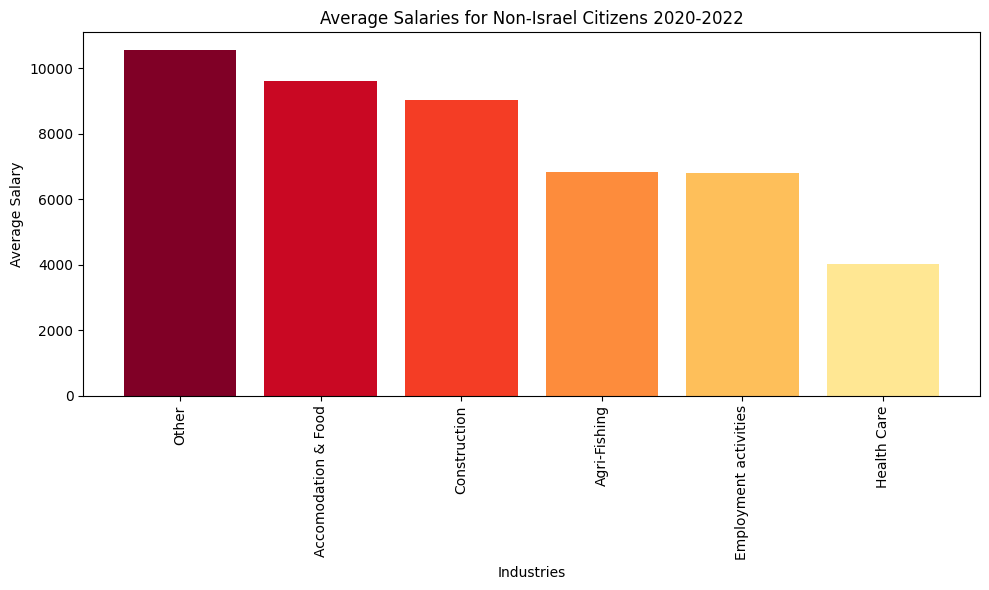

In [29]:
cmap = cm.get_cmap('YlOrRd')
plt.figure(figsize=(10, 6))
bars = plt.bar(non_isr_avgs.index, non_isr_avgs.values, color=[cmap(1-i/len(non_isr_avgs)) for i in range(len(non_isr_avgs))])
plt.xlabel('Industries')
plt.ylabel('Average Salary')
plt.title('Average Salaries for Non-Israel Citizens 2020-2022')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [30]:
print(non_isr.columns.tolist())

['Date', 'Other', 'Health Care', 'Employment activities', 'Accomodation & Food', 'Construction', 'Agri-Fishing']


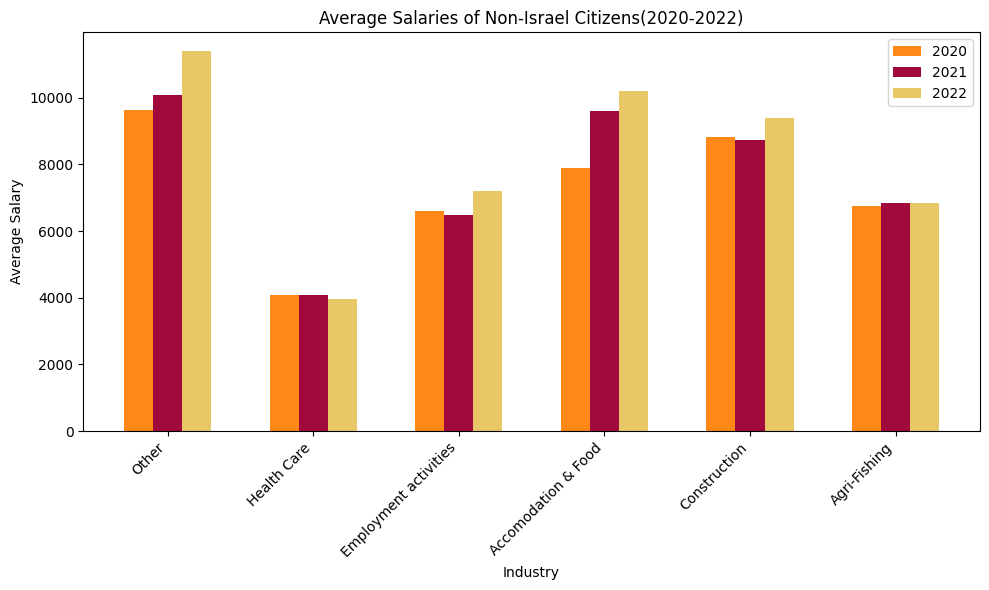

In [33]:
non_isr['Date'] = pd.to_datetime(non_isr['Date'], format='%B, %Y')

non_isr_2020 = non_isr[non_isr['Date'].dt.year == 2020]
non_isr_2021 = non_isr[non_isr['Date'].dt.year == 2021]
non_isr_2022 = non_isr[non_isr['Date'].dt.year == 2022]

# Calculating yearly averages
nonisr_averages_2020 = non_isr_2020[['Other', 'Health Care', 'Employment activities', 'Accomodation & Food', 'Construction', 'Agri-Fishing']].mean().round(2)
nonisr_averages_2021 = non_isr_2021[['Other', 'Health Care', 'Employment activities', 'Accomodation & Food', 'Construction', 'Agri-Fishing']].mean().round(2)
nonisr_averages_2022 = non_isr_2022[['Other', 'Health Care', 'Employment activities', 'Accomodation & Food', 'Construction', 'Agri-Fishing']].mean().round(2)

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis values and width of the bars
x = np.arange(len(nonisr_averages_2020))
bar_width = 0.2

# Plot the bars for 2020, 2021, and 2022
plt.bar(x - bar_width, nonisr_averages_2020, bar_width, color='#ff8817', label='2020')
plt.bar(x, nonisr_averages_2021, bar_width, color='#a1083b', label='2021')
plt.bar(x + bar_width, nonisr_averages_2022, bar_width, color='#e8c766', label='2022')

# Set the x-axis labels to the column names
plt.xticks(x, nonisr_averages_2020.index, rotation=45, ha="right")

# Add labels and title
plt.xlabel('Industry')
plt.ylabel('Average Salary')
plt.title('Average Salaries of Non-Israel Citizens(2020-2022)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


SALARIES BY SECTOR FOR ISRAEL CITIZENS

In [24]:
wages_by_sector.head(2)

,date,private non-profit institutions,house-holds,public non-profit institutions,local authorities,"central government, national insurance institute and national institutions",insurance corporations and pension funds,"financial auxilaries, captive financial institutions and money lenders",other financial intermediaries,monetary financial institutions,non-financial_cooperatives,private_non_financial_ corporation,Unnamed: 12
0,"March, 2022","6,295","5,620","8,876","8,796","14,448","23,935","25,551","27,803","28,228","11,442","13,835",NaN
1,"April, 2022","6,065","5,503","8,966","8,906","14,012","20,585","20,238","24,853","51,543","10,729","12,754",NaN


In [26]:
wages_by_sector.drop(columns=['Unnamed: 12'], inplace=True)

In [39]:
wages_by_sector = wages_by_sector.rename(columns={'Date' : 'Date',
                                                  'private non-profit institutions': 'private non-profit',
                                                  'house-holds' : 'house-holds',
                                                  'public  non-profit institutions' : 'public non-profit',
                                                  'local  authorities' : 'local  authorities',
                                                  'central government, national insurance institute and national institutions ' : 'government and national institutions',
                                                  'insurance corporations and pension funds' : 'insurers and pension funds',
                                                  'financial auxilaries, captive financial institutions and money lenders' : 'financial institutions',
                                                  'other financial  intermediaries' : 'other financial',
                                                  'monetary financial institutions' : 'monetary institutions',
                                                  'non-financial_cooperatives' : 'non-fin cooperatives',
                                                  'private_non_financial_ corporation' : 'private non-fin cooperatives'
                                                  })

In [41]:
wages_by_sector[['private non-profit',
                 'house-holds',
                 'public non-profit',
                 'local  authorities',
                 'government and national institutions',
                 'insurers and pension funds',
                 'financial institutions',
                 'other financial',
                 'monetary institutions',
                 'non-fin cooperatives',
                 'private non-fin cooperatives']] = wages_by_sector[['private non-profit',
                                                                        'house-holds',
                                                                        'public non-profit',
                                                                        'local  authorities',
                                                                        'government and national institutions',
                                                                        'insurers and pension funds',
                                                                        'financial institutions',
                                                                        'other financial',
                                                                        'monetary institutions',
                                                                        'non-fin cooperatives',
                                                                        'private non-fin cooperatives']].applymap(
    lambda x: int(str(x).replace(',', '').replace('\t', '')) if isinstance(x, str) else x
)

In [43]:
avg_wages_by_sector = wages_by_sector[['private non-profit',
                                        'house-holds',
                                        'public non-profit',
                                        'local  authorities',
                                        'government and national institutions',
                                        'insurers and pension funds',
                                        'financial institutions',
                                        'other financial',
                                        'monetary institutions',
                                        'non-fin cooperatives',
                                        'private non-fin cooperatives']].mean().sort_values(ascending=False).round(1)
print(avg_wages_by_sector)

monetary institutions                   28973.7
other financial                         20189.3
financial institutions                  20100.0
insurers and pension funds              18963.4
government and national institutions    15644.2
private non-fin cooperatives            13199.2
non-fin cooperatives                    10973.8
local  authorities                       9845.4
public non-profit                        9559.3
private non-profit                       6555.1
house-holds                              6139.6
dtype: float64


C:\Users\rzagu\AppData\Local\Temp\ipykernel_10360\3988443271.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


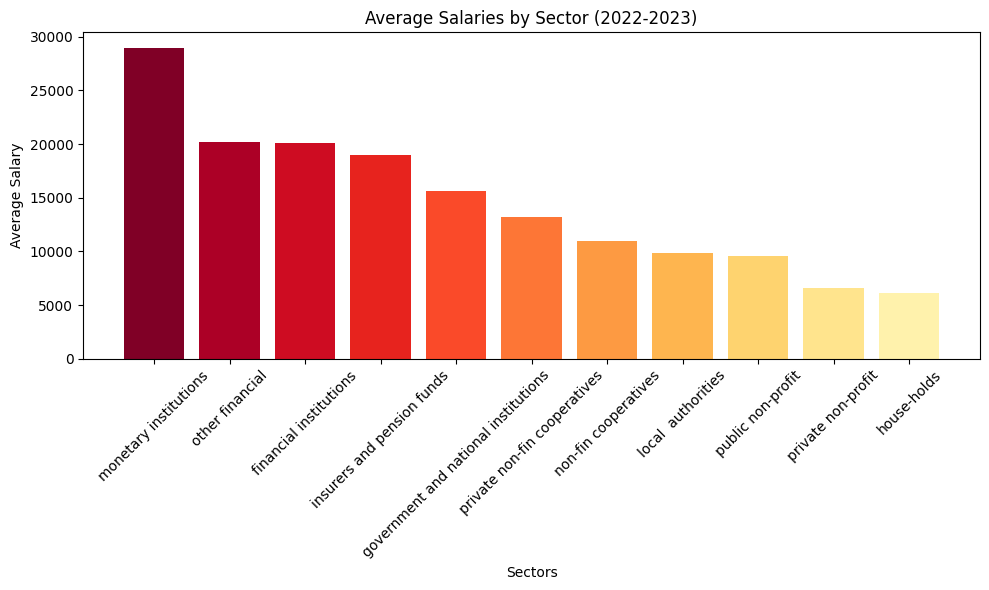

In [45]:
cmap = cm.get_cmap('YlOrRd')
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_wages_by_sector.index, avg_wages_by_sector.values, color=[cmap(1-i/len(avg_wages_by_sector)) for i in range(len(avg_wages_by_sector))])
plt.xlabel('Sectors')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Sector (2022-2023)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

AVERAGE SALARIES BY INDUSTRY

In [52]:
#Renaming the columns for the better visualization:

wages_inds = wages_inds.rename(columns={'Other_service_activities': 'Other Services',
                                        'Arts,_entertainment_and_recreation': 'Arts & Entertainment',
                                        'Homan_health_and_social_work_activities': 'Health',
                                        'Education': 'Education',
                                        'Local,_public_and_defence__administration_and_social_security,_and_Extraterritorial_organizations_and_bodies' : 'Government & Public Services',
                                        'Administrative_and_support_service_activities' :'Administration & Support Services',
                                        'Professional,_scientific_and_technical_activities':'Science',
                                        'Real_estate_activities': 'Real Estate',
                                        'Financial_and_insurance_activities': 'Finance and Insurance',
                                        'Information_and_communication' : 'Information & Communication',
                                        'Accomodation_and_food_service_activities' : 'Accomodation & Food',
                                        'Transportation,_storage,_postal_and_courier_activities' : 'Logistics',
                                        'wholesale_and_retail_trade_and_repair_of_motor_vehicles' : 'Retail & Auto',
                                        'Construction' : 'Construction',
                                        'Electricity_and_water_supply,_sewerage_and_waste_management' : 'Utility Services',
                                        'Manufacturing' : 'Manufacturing',
                                        'Mining_and_quarrying' : 'Mining & Quarrying',
                                        'Agriculture,_forestry_and_fishing' : 'Agri-Fishing',
                                        'Total_Economy' : 'Total Economy'
                                         })

In [53]:
wages_inds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Date                               18 non-null     object
 1   Other Services                     18 non-null     object
 2   Arts & Entertainment               18 non-null     object
 3   Health                             18 non-null     object
 4   Education                          18 non-null     object
 5   Government & Public Services       18 non-null     object
 6   Administration & Support Services  18 non-null     object
 7   Science                            18 non-null     object
 8   Real Estate                        18 non-null     object
 9   Finance and Insurance              18 non-null     object
 10  Information & Communication        18 non-null     object
 11  Accomodation & Food                18 non-null     object
 12  Logistics 

In [54]:
# The datatype is wrong. All the columns, expect "Date" should be in float format.
numeric_columns = wages_inds.columns.difference(['Date'])
wages_inds[numeric_columns] = wages_inds[numeric_columns].applymap(lambda x: int(str(x).replace(',', '').replace('\t', '')) if isinstance(x, str) else x)

In [55]:
# Calculating average salaries
averages = wages_inds[numeric_columns].mean().sort_values(ascending=False).round(1)
print(averages)

Mining & Quarrying                   29707.9
Information & Communication          27818.2
Finance and Insurance                21391.8
Utility Services                     20679.8
Manufacturing                        17295.4
Government & Public Services         17056.6
Science                              17054.4
Real Estate                          13653.3
Logistics                            12808.6
Total Economy                        12299.4
Construction                         11549.6
Retail & Auto                        10236.9
Education                             9272.1
Health                                9015.3
Agri-Fishing                          8497.1
Administration & Support Services     7146.7
Arts & Entertainment                  7041.9
Other Services                        6363.1
Accomodation & Food                   5734.6
dtype: float64


C:\Users\rzagu\AppData\Local\Temp\ipykernel_15760\3976521920.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


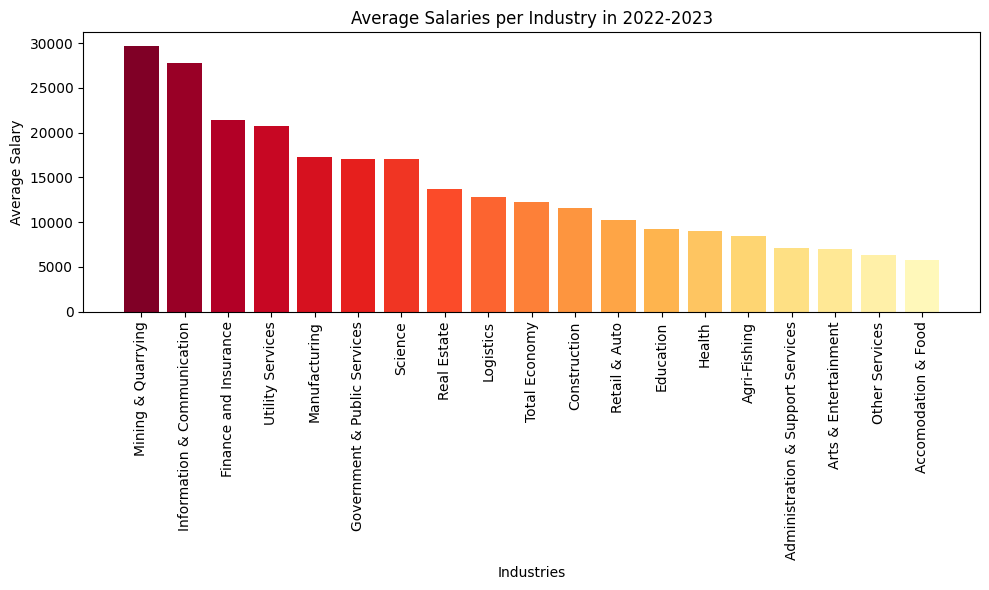

In [56]:
# Createing a bar chart
cmap = cm.get_cmap('YlOrRd')
plt.figure(figsize=(10, 6))
bars = plt.bar(averages.index, averages.values, color=[cmap(1-i/len(averages)) for i in range(len(averages))])

plt.xlabel('Industries')
plt.ylabel('Average Salary')
plt.title('Average Salaries per Industry in 2022-2023')
plt.xticks(rotation=90)
plt.tight_layout()  # Ensuring the labels fit within the figure boundaries
plt.show()

In [57]:
print(wages_inds.columns.tolist())

['Date', 'Other Services', 'Arts & Entertainment', 'Health', 'Education', 'Government & Public Services', 'Administration & Support Services', 'Science', 'Real Estate', 'Finance and Insurance', 'Information & Communication', 'Accomodation & Food', 'Logistics', 'Retail & Auto', 'Construction', 'Utility Services', 'Manufacturing', 'Mining & Quarrying', 'Agri-Fishing', 'Total Economy']


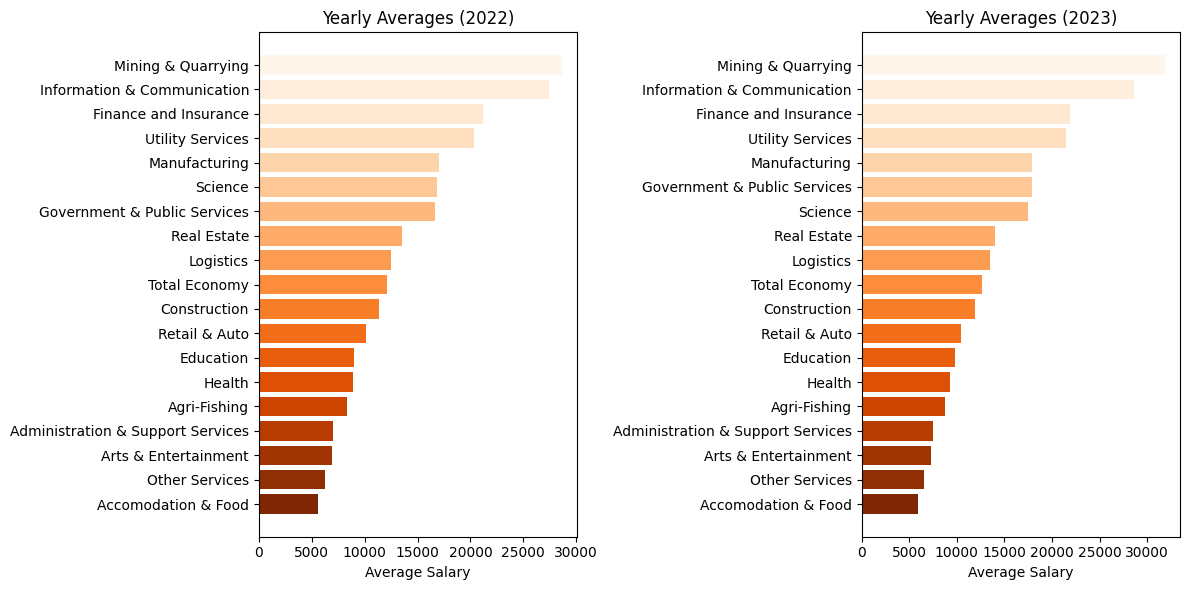

In [58]:
# Comparing results for 2022 and 2023

wages_inds['Date'] = pd.to_datetime(wages_inds['Date'], format='%B, %Y') # Converting the 'Date' column to datetime

# Separating data for 2022 and 2023
wages_inds_2022 = wages_inds[wages_inds['Date'].dt.year == 2022]
wages_inds_2023 = wages_inds[wages_inds['Date'].dt.year == 2023]

# Calculating yearly averages
yearly_averages_2022 = wages_inds_2022[['Other Services', 'Arts & Entertainment', 'Health', 'Education', 'Government & Public Services', 'Administration & Support Services', 'Science', 'Real Estate', 'Finance and Insurance', 'Information & Communication', 'Accomodation & Food', 'Logistics', 'Retail & Auto', 'Construction', 'Utility Services', 'Manufacturing', 'Mining & Quarrying', 'Agri-Fishing', 'Total Economy']].mean().round(2)
yearly_averages_2023 = wages_inds_2023[['Other Services', 'Arts & Entertainment', 'Health', 'Education', 'Government & Public Services', 'Administration & Support Services', 'Science', 'Real Estate', 'Finance and Insurance', 'Information & Communication', 'Accomodation & Food', 'Logistics', 'Retail & Auto', 'Construction', 'Utility Services', 'Manufacturing', 'Mining & Quarrying', 'Agri-Fishing', 'Total Economy']].mean().round(2)

yearly_averages_2022 = yearly_averages_2022.sort_values(ascending=False)
yearly_averages_2023 = yearly_averages_2023.sort_values(ascending=False)

# Creating a gradient pallete
colors = plt.cm.Oranges(np.linspace(0, 1, len(yearly_averages_2022)))

# Create two separate barcharts
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.barh(yearly_averages_2022.index, yearly_averages_2022, color=colors)
plt.xlabel('Average Salary')
plt.title('Yearly Averages (2022)')
plt.gca().invert_yaxis()  


plt.subplot(1, 2, 2)
plt.barh(yearly_averages_2023.index, yearly_averages_2023, color=colors)
plt.xlabel('Average Salary')
plt.title('Yearly Averages (2023)')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

In [59]:
# We can also see that "Total Economy" is located in the center of the data, therefore the calculations were made correctly.

SALARIES IN HIGH TECH

In [19]:
hightech_wages.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,date,excluding_hightech,scientific_research_and_development,information_service_activities,computer_programing_consultancy_and_related_se...,telecomunication,manufacture_of_motor_vehicles_and_other_transp...,"manufacturing_ofcomputers,_electronic_and_opti...",manufacturing_of_pharmaceuitical_products,NaN,NaN,NaN,NaN
1,"January, 2022","10,078","28,309","21,996","29,204","17,480","20,863","25,697","18,530",NaN,NaN,NaN,NaN
2,"February, 2022","10,067","40,854","26,449","30,452","16,869","20,371","26,082","18,526",NaN,NaN,NaN,NaN


In [20]:
hightech_wages.columns = hightech_wages.iloc[0] #Setting the first row as the header
hightech_wages = hightech_wages.iloc[1:].reset_index(drop=True) #Dropping the second row
hightech_wages = hightech_wages.iloc[:, :-4] #Dropping the last 4 columns that contain only NaN values
hightech_wages.head(3)

,date,excluding_hightech,scientific_research_and_development,information_service_activities,computer_programing_consultancy_and_related_services,telecomunication,manufacture_of_motor_vehicles_and_other_transport_equipment,"manufacturing_ofcomputers,_electronic_and_optical_products",manufacturing_of_pharmaceuitical_products
0,"January, 2022","10,078","28,309","21,996","29,204","17,480","20,863","25,697","18,530"
1,"February, 2022","10,067","40,854","26,449","30,452","16,869","20,371","26,082","18,526"
2,"March, 2022","10,791","31,381","22,829","31,351","21,181","22,747","28,921","31,055"


In [23]:
hightech_wages = hightech_wages.rename(columns={'date' : 'Date',
                                                'excluding_hightech' : 'Excluding Hightech',
                                                'scientific_research_and_development' : 'Scientific R&D',
                                                'information_service_activities' : 'Information Services',
                                                'computer_programing_consultancy_and_related_services' : 'IT Consulting Services',
                                                'telecomunication' : 'Telecommunication',
                                                'manufacture_of_motor_vehicles_and_other_transport_equipment' : 'Vehicle Manufacturing',
                                                'manufacturing_ofcomputers,_electronic_and_optical_products' : 'Electronics Manufacturing',
                                                'manufacturing_of_pharmaceuitical_products' : 'Pharmaceutical Manufacturing'
                                                  })

In [24]:
num_cols = hightech_wages.columns.difference(['Date'])
hightech_wages[num_cols] = hightech_wages[num_cols].applymap(lambda x: int(str(x).replace(',', '').replace('\t', '')) if isinstance(x, str) else x)
hightech_wages_avgs = hightech_wages[num_cols].mean().sort_values(ascending=False).round(1)
print(hightech_wages_avgs)

0
Scientific R&D                  31080.3
IT Consulting Services          30113.2
Electronics Manufacturing       26592.4
Information Services            25463.8
Pharmaceutical Manufacturing    21993.4
Vehicle Manufacturing           21964.4
Telecommunication               17800.8
Excluding Hightech              10578.9
dtype: float64


C:\Users\rzagu\AppData\Local\Temp\ipykernel_22868\1901013243.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


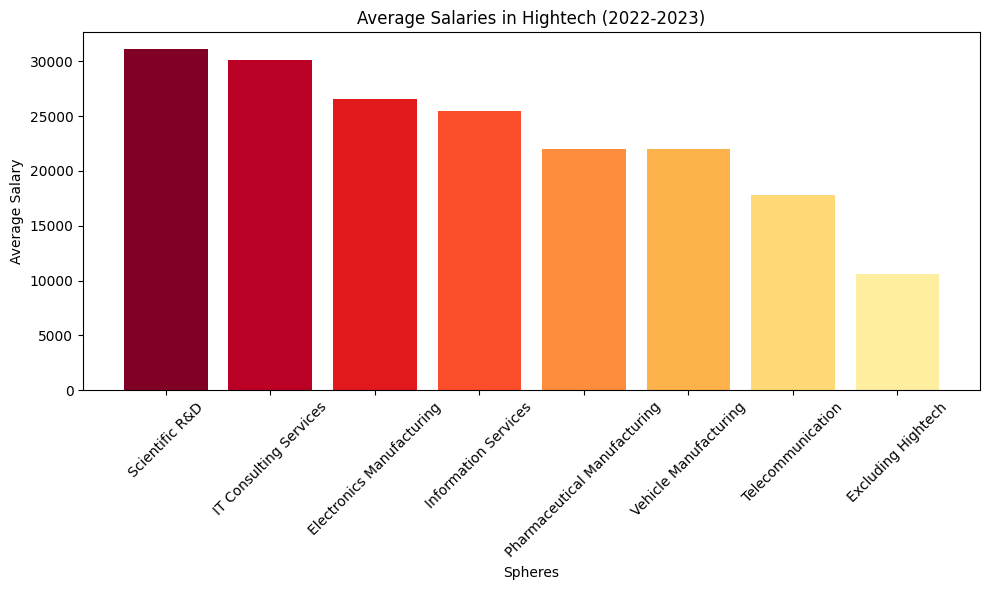

In [26]:
cmap = cm.get_cmap('YlOrRd')
plt.figure(figsize=(10, 6))
bars = plt.bar(hightech_wages_avgs.index, hightech_wages_avgs.values, color=[cmap(1-i/len(hightech_wages_avgs)) for i in range(len(hightech_wages_avgs))])
plt.xlabel('Spheres')
plt.ylabel('Average Salary')
plt.title('Average Salaries in Hightech (2022-2023)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

NUMBER OF EMPLOYEES IN EACH SPHERE

In [53]:
total_empl_perc.head(20)

,sphere,percentage_2023,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"\nAgriculture, forestry and fishing",1.2,NaN,NaN,NaN
1,\nMining and quarrying,0.1,NaN,NaN,NaN
2,\nManufacturing,8.7,NaN,NaN,NaN
3,"Electricity and water supply, sewerage and was...",0.8,NaN,NaN,NaN
4,construction,5.1,NaN,NaN,NaN
5,Wholesale and retail trade and repair of motor...,12.6,NaN,NaN,NaN
6,"Transportation, storage, postal and courier ac...",3.7,NaN,NaN,NaN
7,Accommodation and food service activities,6.2,NaN,NaN,NaN
8,Information and communications,6.2,NaN,NaN,NaN
9,Financial and insurance activities,2.8,NaN,NaN,NaN


In [54]:
total_empl_perc = total_empl_perc.iloc[:, :-3] #Dropping the last 3 columns

total_empl_perc['sphere'] = total_empl_perc['sphere'].str.replace('\n', '')  #Updating the values in the 'sphere' column
total_empl_perc['sphere'] = total_empl_perc['sphere'].replace({
    'Agriculture, forestry and fishing': 'Agri-Fishing',
    'Mining and quarrying': 'Mining and Quarrying',
    'Manufacturing': 'Manufacturing',
    'Electricity and water supply, sewerage and waste management': 'Utilities and Waste Management',
    'construction': 'Construction',
    'Wholesale and retail trade and repair of motor vehicles': 'Retail and Motor Trade',
    'Transportation, storage, postal and courier activities': 'Transportation and Postal Services',
    'Accommodation and food service activities': 'Food Services',
    'Information and communications': 'Information and Communications',
    'Financial and insurance activities': 'Financial and Insurance Services',
    'Real estate activities': 'Real Estate',
    'Professional, scientific and technical activities': 'Professional and Technical Services',
    'Administrative and support service activities': 'Administrative and Support Services',
    'Local, public and defence administration and social security, and extraterritorial organizations and bodies': 'Public Administration',
    'Education': 'Education',
    'Human health and social work activities': 'Health and Social Work',
    'Arts, entertainment and recreation': 'Arts and Recreation',
    'Other service activities': 'Other Services'
})

total_empl_perc.head(20)


,sphere,percentage_2023
0,Agri-Fishing,1.2
1,Mining and Quarrying,0.1
2,Manufacturing,8.7
3,Utilities and Waste Management,0.8
4,Construction,5.1
5,Retail and Motor Trade,12.6
6,Transportation and Postal Services,3.7
7,Food Services,6.2
8,Information and Communications,6.2
9,Financial and Insurance Services,2.8


C:\Users\rzagu\AppData\Local\Temp\ipykernel_22868\3500630792.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20c')


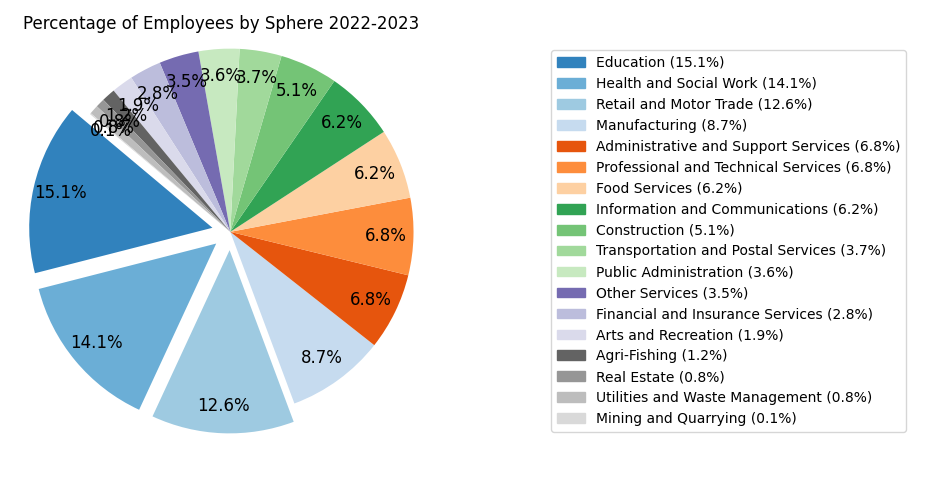

In [75]:

from matplotlib.patches import Patch

sphere = total_empl_perc['sphere']
percentage_2023 = total_empl_perc['percentage_2023']

total_empl_perc = total_empl_perc.dropna() #Removing rows with NaN values

sphere = total_empl_perc['sphere'] #Updating the data
percentage_2023 = total_empl_perc['percentage_2023']

#Creating a pie chart
cmap = get_cmap('tab20c') 
colors = cmap(np.linspace(0, 1, len(sphere)))

explode = [0.1 if percentage > 10 else 0 for percentage in percentage_2023]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) #Creating two subplots: one for the pie chart and one for the legend

wedges, texts, autotexts = ax1.pie(
    percentage_2023,
    labels=None,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    pctdistance=0.85,
    textprops={'fontsize': 12}
)
ax1.set_title('Percentage of Employees by Sphere 2022-2023', y=0.94)
ax1.axis('equal')

sorted_data = sorted(zip(sphere, percentage_2023, colors), key=lambda x: x[1], reverse=True) #Sorting the data by percentages in descending order for the legend
legend_labels = [Patch(color=color, label=f'{sphere} ({percentage:.1f}%)') for sphere, percentage, color in sorted_data]

ax2.legend(handles=legend_labels, loc='center', fontsize=10)
ax2.axis('off')

plt.show()

HOW MANY PEOPLE ARE THERE?

In [5]:
positions_by_industry.head(2) #number of positions in thousands

,Date,Other_service_activities,Arts_entertainment_and_recreation,Homan_health_and_social_work_activities,Education,Local_public_and_fefence__administration_and_social_security_and_Extraterritorial_organizations_and_bodies,Administrative_and_support_service_activities,Professional_scientific_and_technical_activities,Real_estate_activities,Financial_and_insurance_activities,...,Construction,Electricity_and_water_supply_sewerage_and_waste_management,Manufacturing,Mining_and_quarrying,Agriculture_forestry_and_fishing,Total_Economy,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,"January, 2022",128.2,73.1,540.6,559.1,144.5,266.7,266.8,31.5,108.2,...,203.4,32.8,353.2,4.6,47.5,"3,897.8",NaN,NaN,NaN,NaN
1,"February, 2022",129.6,75.0,541.8,559.1,144.8,269.5,267.6,31.8,108.7,...,204.7,32.7,354.1,4.6,47.6,"3,923.0",NaN,NaN,NaN,NaN


In [37]:
positions_by_industry = positions_by_industry.iloc[:, :-4]
print(positions_by_industry.columns.tolist())

['Date', 'Other Services', 'Art & Entertainment', 'Health & Social Work', 'Education', 'Defence & Administration', 'Administrative Service', 'Professional Science', 'Real Estate', 'Finance & Insurance', 'Information & Communication', 'Food Service', 'Transportation & Storage', 'Retail and Motor Trade', 'Construction', 'Utility Services', 'Manufacturing', 'Mining & Quarrying', 'Agri-fishing', 'Total_Economy']


In [35]:
positions_by_industry = positions_by_industry.rename(columns={'Other_service_activities' : 'Other Services',
                                                              'Arts_entertainment_and_recreation' : 'Art & Entertainment',
                                                              'Homan_health_and_social_work_activities' : 'Health & Social Work',
                                                              'Local_public_and_fefence__administration_and_social_security_and_Extraterritorial_organizations_and_bodies' : 'Defence & Administration',
                                                              'Administrative_and_support_service_activities' : 'Administrative Service',
                                                              'Professional_scientific_and_technical_activities' : 'Professional Science',
                                                              'Real_estate_activities' : 'Real Estate',
                                                              'Financial_and_insurance_activities' : 'Finance & Insurance',
                                                              'Information_and_communication' : 'Information & Communication',
                                                              'Accomodation_and_food_service_activities' : 'Food Service',
                                                              'Transportation_storage_postal_and_courier_activities' : 'Transportation & Storage',
                                                              'wholesale_and_retail_trade_and_repair_of_motor_vehicles' : 'Retail and Motor Trade',
                                                              'Electricity_and_water_supply_sewerage_and_waste_management' : 'Utility Services',
                                                              'Mining_and_quarrying' : 'Mining & Quarrying',
                                                              'Agriculture_forestry_and_fishing' : 'Agri-fishing'})

In [41]:
num_columns = positions_by_industry.columns.difference(['Date'])
positions_by_industry[num_columns] = positions_by_industry[num_columns].applymap(
    lambda x: int(float(x.replace(',', '').replace('\t', ''))) if isinstance(x, str) and x.replace(',', '').replace('\t', '').replace('.', '', 1).isdigit() else x
)
positions_by_industry_avg = positions_by_industry[num_columns].mean().sort_values(ascending=False).round(1)
print(positions_by_industry_avg) #Average number of people in each sphere

Total_Economy                  3967.7
Education                       569.8
Health & Social Work            553.2
Retail and Motor Trade          515.7
Manufacturing                   355.6
Professional Science            272.9
Administrative Service          270.8
Information & Communication     248.8
Food Service                    239.9
Construction                    208.6
Transportation & Storage        148.2
Defence & Administration        145.4
Other Services                  136.1
Finance & Insurance             111.1
Art & Entertainment              74.4
Agri-fishing                     47.1
Utility Services                 33.0
Real Estate                      33.0
Mining & Quarrying                4.7
dtype: float64


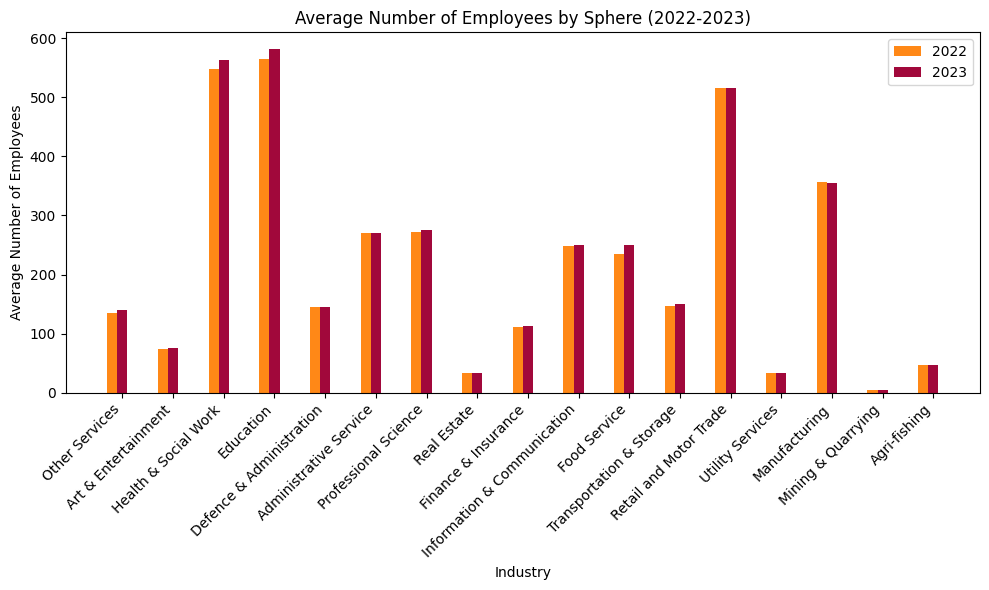

In [45]:
positions_by_industry['Date'] = pd.to_datetime(positions_by_industry['Date'], format='%B, %Y')

positions_by_industry_22 = positions_by_industry[positions_by_industry['Date'].dt.year == 2022]
positions_by_industry_23 = positions_by_industry[positions_by_industry['Date'].dt.year == 2023]

#Yearly averages
positions_avg_22 = positions_by_industry_22[['Other Services', 'Art & Entertainment', 'Health & Social Work', 'Education', 'Defence & Administration', 'Administrative Service', 'Professional Science', 'Real Estate', 'Finance & Insurance', 'Information & Communication', 'Food Service', 'Transportation & Storage', 'Retail and Motor Trade', 'Utility Services', 'Manufacturing', 'Mining & Quarrying', 'Agri-fishing']].mean().round(2)
positions_avg_23 = positions_by_industry_23[['Other Services', 'Art & Entertainment', 'Health & Social Work', 'Education', 'Defence & Administration', 'Administrative Service', 'Professional Science', 'Real Estate', 'Finance & Insurance', 'Information & Communication', 'Food Service', 'Transportation & Storage', 'Retail and Motor Trade', 'Utility Services', 'Manufacturing', 'Mining & Quarrying', 'Agri-fishing']].mean().round(2)

#Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(positions_avg_22))
bar_width = 0.2

plt.bar(x - bar_width, positions_avg_22, bar_width, color='#ff8817', label='2022')
plt.bar(x, positions_avg_23, bar_width, color='#a1083b', label='2023')
plt.xticks(x, positions_avg_22.index, rotation=45, ha="right")
plt.xlabel('Industry')
plt.ylabel('Average Number of Employees')
plt.title('Average Number of Employees by Sphere (2022-2023)')
plt.legend()
plt.tight_layout()
plt.show()
